In [28]:
import pandas as pd
import numpy as np
rating_data = pd.read_csv('data/train_ratings.csv')

In [29]:
rating_data.describe()

user_id       movie_id         rating     timestamp
count  800167.000000  800167.000000  800167.000000  8.001670e+05
mean     3024.429403    1865.623762       3.581490  9.722470e+08
std      1728.104442    1096.269149       1.117253  1.215774e+07
min         1.000000       1.000000       1.000000  9.567039e+08
25%      1506.000000    1029.000000       3.000000  9.653029e+08
50%      3069.000000    1835.000000       4.000000  9.730218e+08
75%      4476.000000    2770.000000       4.000000  9.752206e+08
max      6040.000000    3952.000000       5.000000  1.046455e+09

In [30]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800167 entries, 0 to 800166
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    800167 non-null  int64
 1   movie_id   800167 non-null  int64
 2   rating     800167 non-null  int64
 3   timestamp  800167 non-null  int64
dtypes: int64(4)
memory usage: 24.4 MB


In [31]:
value_counts =rating_data['user_id'].value_counts().sort_index().to_frame()
value_counts.describe()

count
count  6040.000000
mean    132.477980
std     154.162074
min      10.000000
25%      35.000000
50%      76.000000
75%     167.000000
max    1858.000000

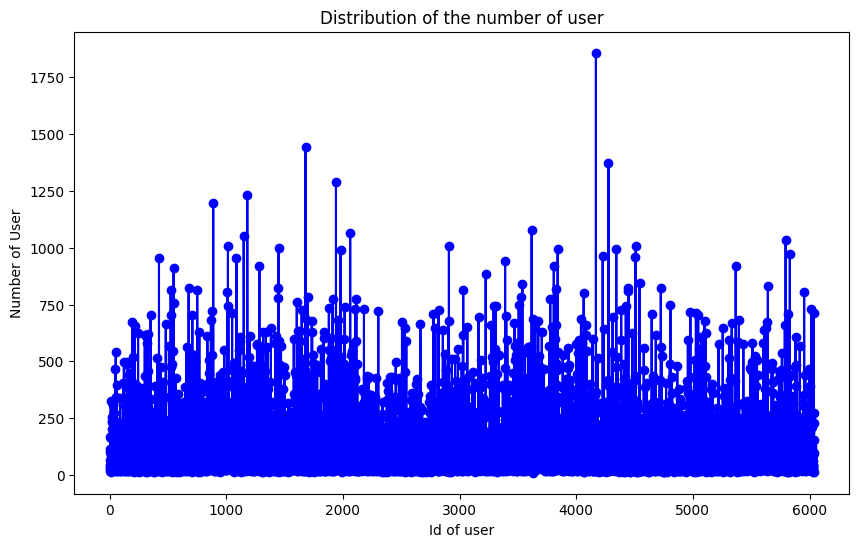

In [34]:
# draw the distribution of the number of user
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(np.array(value_counts.index), value_counts['count'].values, marker='o', linestyle='-', color='b')
plt.title('Distribution of the number of user')
plt.xlabel('Id of user')
plt.ylabel('Number of User')
plt.show()


In [35]:
# calculate the lack of movieId for each user
# firstly, we construct a dictionary to store the movieId for each user
from collections import defaultdict
movie_dict = defaultdict(list)
for index, row in rating_data.iterrows():
    user_id = row['user_id']
    movie_id = row['movie_id']
    movie_dict[user_id].append(movie_id)

# get the missing movieId for each user

defaultdict(list,
            {5412: [2683,
              2745,
              1690,
              3452,
              1196,
              1688,
              112,
              3082,
              539,
              1136,
              1453,
              1210,
              1293,
              589,
              2161,
              464,
              1918,
              2712,
              344,
              2997,
              1687,
              1275,
              1258,
              2105,
              1092,
              1035,
              1089,
              2571,
              1197,
              1393,
              296,
              3091,
              1923,
              1973,
              2393,
              2542,
              1748,
              150,
              919,
              3185,
              858,
              2880,
              1954,
              2915,
              1215,
              930,
              2529,
              2826,
              2504,
      

In [45]:
# Persist files to disk for quick reading next time
import pickle
with open('movie_dict.pkl', 'wb') as f:
    pickle.dump(movie_dict, f)
del movie_dict

In [52]:
movie_ids = set(rating_data['movie_id'].unique())
len(movie_ids)

3675

In [57]:
# calculate the number of missing movieId for each user
missing_movie_id = {}
with open('movie_dict.pkl', 'rb') as f:
    movie_dict = pickle.load(f)
for user_id, movie_list in movie_dict.items():
    user_movie_set = set(movie_list)
    missing_movie_id[user_id] = list(movie_ids - user_movie_set)

# store the missing_movie_id to disk
with open('missing_movie_id.pkl', 'wb') as f:
    pickle.dump(missing_movie_id, f)


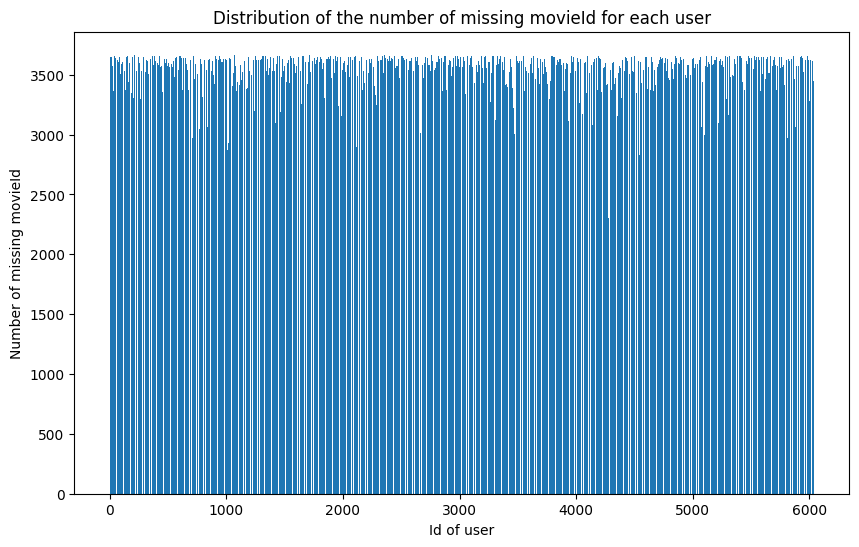

In [73]:
# analysis the missing movieId for each user
# draw the distribution of the number of missing movieId for each user
missing_movie_id_count = {}
for user_id, movie_list in missing_movie_id.items():
    missing_movie_id_count[user_id] = len(movie_list)
sorted_missing_movie_id_count = dict(sorted(missing_movie_id_count.items(), key=lambda x: x[0]))
plt.figure(figsize=(10, 6))
plt.bar(list(sorted_missing_movie_id_count.keys()), list(sorted_missing_movie_id_count.values()))
plt.title('Distribution of the count of missing movieId for each user')
plt.xlabel('Id of user')
plt.ylabel('Number of missing movieId')
plt.show()



In [78]:
# del missing_movie_id
# del movie_dict
# del sorted_missing_movie_id_count


In [86]:
# query the recent movie for each user
movie_dict = pd.read_csv('data/train_ratings.csv')
movie_dict_user = movie_dict.sort_values(by=['user_id', 'timestamp'], ascending=[True, False])
# get the top 5 movie for each user
movie_dict_user_top5 = movie_dict_user.groupby('user_id').head(20)

movie_dict_user_top5.to_csv('movie_dict_user_top20.csv', index=False)

In [112]:
rating_data

user_id  movie_id  rating   timestamp
0          5412      2683       2   960243649
1          5440       904       5   959995181
2           368      3717       4   976311423
3           425      1721       4   976283587
4          4942      3697       1   962642480
...         ...       ...     ...         ...
800162      398      3081       4  1044565753
800163      669        70       2   975633579
800164     3685      2108       4   967121561
800165     3312      3616       4   983252174
800166     4811      1041       4   962933524

[800167 rows x 4 columns]

In [87]:

rating_matrix = rating_data.pivot_table(values='rating',index='user_id',columns=
                                        'movie_id')
rating_matrix

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5          NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
6036       NaN   NaN   NaN   2.0   NaN   3.0   NaN   NaN   NaN   NaN  ...   
6037       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6038       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6039       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6040       3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

movie_id  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
user_id                                                               
1          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
6036       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6037       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6038       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6039       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6040       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[6040 rows x 3675 columns]

In [89]:
def cosine_similarity(matrix):
    # Normalize the rating matrix
    norm_matrix = matrix.sub(matrix.mean(axis=1), axis=0).fillna(0)
    dot_product = np.dot(norm_matrix, norm_matrix.T)
    norm = np.linalg.norm(norm_matrix, axis=1)
    similarity = dot_product / np.outer(norm, norm)
    np.fill_diagonal(similarity, 0)  # Fill diagonal with zeros to exclude self-similarity
    return pd.DataFrame(similarity, index=matrix.index, columns=matrix.index)

user_similarity = cosine_similarity(rating_matrix)
user_similarity

/var/folders/tt/pf5xh4vs14v9h68lqh4py2s00000gn/T/ipykernel_60142/3261904391.py:6: RuntimeWarning: invalid value encountered in divide
  similarity = dot_product / np.outer(norm, norm)


user_id      1         2         3         4         5         6         7     \
user_id                                                                         
1        0.000000  0.043744 -0.012663  0.025423 -0.015363 -0.014262  0.021082   
2        0.043744  0.000000  0.024736 -0.020707 -0.004797 -0.015652  0.091208   
3       -0.012663  0.024736  0.000000  0.040803 -0.016591  0.001251  0.052652   
4        0.025423 -0.020707  0.040803  0.000000 -0.017175  0.032216  0.041910   
5       -0.015363 -0.004797 -0.016591 -0.017175  0.000000 -0.050082  0.055303   
...           ...       ...       ...       ...       ...       ...       ...   
6036    -0.008044  0.070933  0.036340  0.027736  0.030528 -0.044748  0.036211   
6037    -0.008726  0.061838 -0.009103  0.020628 -0.024821  0.016545 -0.080063   
6038     0.000000  0.015344  0.000000 -0.027157  0.002233 -0.017645  0.000000   
6039     0.048644  0.035695  0.045094 -0.036191  0.020243 -0.023798 -0.001310   
6040     0.005908 -0.020947 -0.045820  0.034454  0.077457  0.024082  0.032729   

user_id      8         9         10    ...      6031      6032      6033  \
user_id                                ...                                 
1        0.015885  0.110794  0.025970  ... -0.014423  0.011352  0.035935   
2       -0.017063  0.073396 -0.036306  ... -0.013472  0.020239 -0.004569   
3       -0.061585 -0.038694 -0.018285  ...  0.000737 -0.007302 -0.016350   
4        0.018973  0.026391 -0.044947  ... -0.030217  0.001902  0.051511   
5        0.055632 -0.014337  0.008004  ...  0.011552  0.016395 -0.003478   
...           ...       ...       ...  ...       ...       ...       ...   
6036     0.044962 -0.008173  0.002948  ... -0.004808  0.033003  0.024945   
6037    -0.039696  0.068503  0.005251  ...  0.027312  0.061242 -0.001585   
6038     0.001477  0.019887  0.025523  ... -0.068012 -0.013103  0.000000   
6039     0.005826  0.001729 -0.004122  ... -0.029756 -0.013710  0.000762   
6040     0.046275  0.030445 -0.002392  ... -0.016415  0.059704 -0.006757   

user_id      6034      6035      6036      6037      6038      6039      6040  
user_id                                                                        
1        0.003207  0.076923 -0.008044 -0.008726  0.000000  0.048644  0.005908  
2        0.000000  0.065101  0.070933  0.061838  0.015344  0.035695 -0.020947  
3        0.000000  0.002590  0.036340 -0.009103  0.000000  0.045094 -0.045820  
4        0.000000 -0.049973  0.027736  0.020628 -0.027157 -0.036191  0.034454  
5        0.022396  0.062275  0.030528 -0.024821  0.002233  0.020243  0.077457  
...           ...       ...       ...       ...       ...       ...       ...  
6036     0.058386  0.079117  0.000000  0.030707 -0.028015  0.021710  0.071666  
6037    -0.023685  0.003376  0.030707  0.000000 -0.015839  0.036714  0.025126  
6038     0.000000  0.014137 -0.028015 -0.015839  0.000000  0.084413 -0.014445  
6039     0.051258  0.010430  0.021710  0.036714  0.084413  0.000000  0.056030  
6040     0.037348 -0.015878  0.071666  0.025126 -0.014445  0.056030  0.000000  

[6040 rows x 6040 columns]

In [111]:
import numpy as np
import pandas as pd
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args,**kwargs):
        start_time = time.perf_counter()
        result = func(*args,**kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'function {func.__name__} run_time :{total_time:.4f} s')
        return result
    return timeit_wrapper

def predict_ratings_for_user(user_id, rating_matrix, user_similarity, k=10):
    # 获取与目标用户相似的其他用户
    similar_users = user_similarity[user_id].drop(user_id).dropna()
    # 选择最相似的前 k 个用户
    similar_users = similar_users.nlargest(k)
    
    # 获取用户未评分的电影
    user_ratings = rating_matrix.loc[user_id]
    unrated_movies = user_ratings[user_ratings.isna()].index
    
    # 只选择最相似的用户评分矩阵
    similar_user_ratings = rating_matrix.loc[similar_users.index, unrated_movies]
    
    # 对于没有评分的电影，先用平均值填充
    global_mean = rating_matrix.mean(axis=0)
    similar_user_ratings = similar_user_ratings.fillna(global_mean[unrated_movies])

    # 进行加权平均的向量化计算
    weights = np.array(similar_users.values).reshape(-1, 1)
    weighted_sum = np.dot(weights.T, similar_user_ratings)
    normalization = np.sum(weights)
    
    # 计算预测评分
    predicted_ratings = weighted_sum.flatten() / normalization
    
    return pd.Series(predicted_ratings, index=unrated_movies)

@timeit
def recommend_movies_user(user_id, rating_matrix, user_similarity, top_n=1, k=10):
    # 预测用户对未评分电影的评分
    #start_time = time.time()
    predicted_ratings = predict_ratings_for_user(user_id, rating_matrix, user_similarity, k)
    #end_time = time.time()
    #print('predict_ratings', end_time - start_time)
    
    # 按照预测评分排序，推荐前 top_n 个电影
    recommendations = predicted_ratings.sort_values(ascending=False).head(top_n)
    return recommendations

# 示例：为用户 ID 1 生成推荐
user_id = 1
recommendations_user = recommend_movies_user(user_id, rating_matrix, user_similarity)
print(f"Top recommendations for User {user_id}:\n{recommendations_user}")


函数 recommend_movies_user 运行时间：0.3848 秒
Top recommendations for User 1:
movie_id
2309    5.0
3607    5.0
3656    5.0
687     5.0
3382    5.0
787     5.0
3280    5.0
3172    5.0
989     5.0
3233    5.0
dtype: float64


In [114]:
user_ids = rating_matrix.index
user_ids

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040],
      dtype='int64', name='user_id', length=6040)

In [106]:
import time

def predict_ratings_for_user(user_id, rating_matrix, user_similarity, k=10):
    # 获取与目标用户相似的其他用户
    similar_users = user_similarity[user_id].drop(user_id).dropna()
    # 选择最相似的前 k 个用户
    similar_users = similar_users.nlargest(k)
    # 获取用户未评分的电影
    user_ratings = rating_matrix.loc[user_id]
    unrated_movies = user_ratings[user_ratings.isna()].index
    predictions = {}
    print(len(unrated_movies))
    # 改成向量
    
    for movie_id in unrated_movies:
        # 获取对该电影有评分的用户
        movie_ratings = rating_matrix.loc[:, movie_id]
        valid_users = movie_ratings[movie_ratings.notna()].index
        # 找到既相似又对电影有评分的用户
        common_users = similar_users.index.intersection(valid_users)
        if common_users.empty:
            # 如果没有相似用户对该电影评分，使用全局平均评分
            predicted_rating = rating_matrix.mean(axis=0)[movie_id]
        else:
            weights = similar_users.loc[common_users]
            ratings = movie_ratings.loc[common_users]
            predicted_rating = np.dot(weights, ratings) / weights.sum()
        predictions[movie_id] = predicted_rating
    return pd.Series(predictions)

def recommend_movies_user(user_id, rating_matrix, user_similarity, top_n=5, k=10):
    # 预测用户对未评分电影的评分
    start_time = time.time()
    predicted_ratings = predict_ratings_for_user(user_id, rating_matrix, user_similarity, k)
    end_time = time.time()
    print('predict_ratings',end_time-start_time)
    # 按照预测评分排序，推荐前 top_n 个电影
    recommendations = predicted_ratings.sort_values(ascending=False).head(top_n)
    return recommendations

# 示例：为用户 ID 1 生成推荐
user_id = 1
recommendations_user = recommend_movies_user(user_id, rating_matrix, user_similarity)
print(f"Top recommendations for User {user_id}:\n{recommendations_user}")


3632
predict_ratings 163.33952283859253
Top recommendations for User 1:
2501    5.0
356     5.0
1704    5.0
3382    5.0
3129    5.0
dtype: float64
